<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [16]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')

In [17]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.166560,27.775891,64.743862,92.325314,-0.000381,278.011245,278.008423,0.002822
1,0.0,1.0,62.485569,78.486608,95.766567,43.391142,0.009084,290.138970,290.131425,0.007545
2,0.0,2.0,82.352198,96.419910,73.162382,32.611890,-0.020996,294.525384,294.548639,-0.023255
3,0.0,3.0,96.467410,88.528888,36.568341,41.873250,-0.000594,273.437295,273.437898,-0.000603
4,0.0,4.0,71.251553,38.159169,63.261346,41.596880,0.024557,224.293505,224.268223,0.025282
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.772408,63.286199,28.502465,24.555826,0.022132,206.139030,206.116968,0.022062
119996,999.0,116.0,76.553394,30.522801,37.344149,94.457696,-0.010802,248.867239,248.870452,-0.003214
119997,999.0,117.0,80.267284,88.951947,78.049242,58.853326,-0.001794,316.120005,316.121901,-0.001896
119998,999.0,118.0,24.344754,44.805654,85.227839,72.949813,0.049128,237.377189,237.329276,0.047913


In [18]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245  278.008423  0.002822
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970  290.131425  0.007545
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384  294.548639 -0.023255
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295  273.437898 -0.000603
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505  224.268223  0.025282
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030  206.116968  0.022062
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239  248.870452 -0.003214
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005  316.121901 -0.001896
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189  237.329276  0.047913
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900  293.845530 -0.016630

[120000 rows x 8 columns]

In [19]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245  278.008423  0.002822
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970  290.131425  0.007545
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384  294.548639 -0.023255
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295  273.437898 -0.000603
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505  224.268223  0.025282
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030  206.116968  0.022062
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239  248.870452 -0.003214
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005  316.121901 -0.001896
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189  237.329276  0.047913
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900  293.845530 -0.016630

[120000 rows x 8 columns]

In [20]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.166560,27.775891,64.743862,92.325314,-0.000381,278.011245,278.008423,0.002822
1,0.0,1.0,62.485569,78.486608,95.766567,43.391142,0.009084,290.138970,290.131425,0.007545
2,0.0,2.0,82.352198,96.419910,73.162382,32.611890,-0.020996,294.525384,294.548639,-0.023255
3,0.0,3.0,96.467410,88.528888,36.568341,41.873250,-0.000594,273.437295,273.437898,-0.000603
4,0.0,4.0,71.251553,38.159169,63.261346,41.596880,0.024557,224.293505,224.268223,0.025282
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.772408,63.286199,28.502465,24.555826,0.022132,206.139030,206.116968,0.022062
119996,999.0,116.0,76.553394,30.522801,37.344149,94.457696,-0.010802,248.867239,248.870452,-0.003214
119997,999.0,117.0,80.267284,88.951947,78.049242,58.853326,-0.001794,316.120005,316.121901,-0.001896
119998,999.0,118.0,24.344754,44.805654,85.227839,72.949813,0.049128,237.377189,237.329276,0.047913


In [21]:
table.set_index(['rep', 'index'], inplace=True)

In [22]:
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245  278.008423  0.002822
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970  290.131425  0.007545
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384  294.548639 -0.023255
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295  273.437898 -0.000603
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505  224.268223  0.025282
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030  206.116968  0.022062
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239  248.870452 -0.003214
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005  316.121901 -0.001896
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189  237.329276  0.047913
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900  293.845530 -0.016630

[120000 rows x 8 columns]

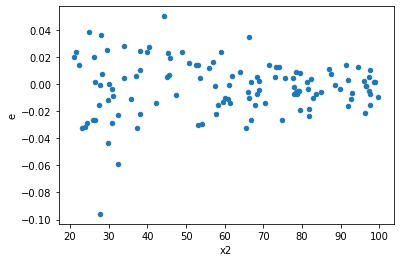

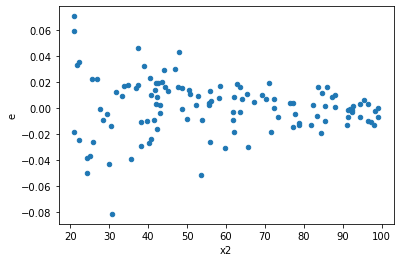

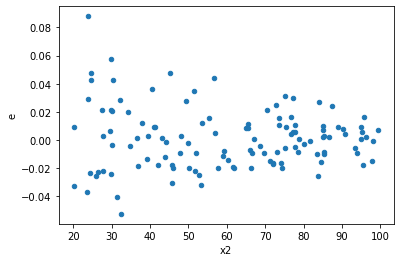

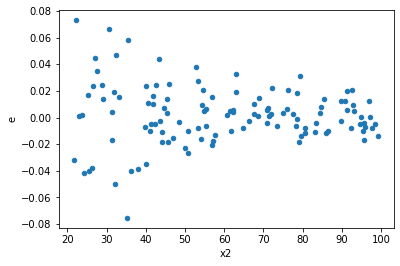

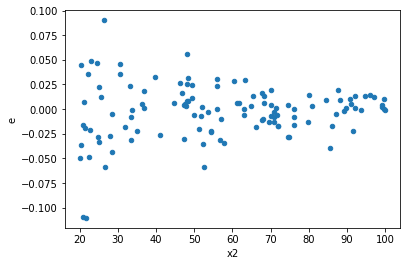

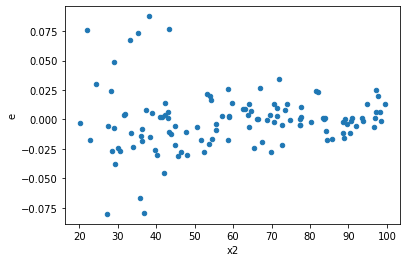

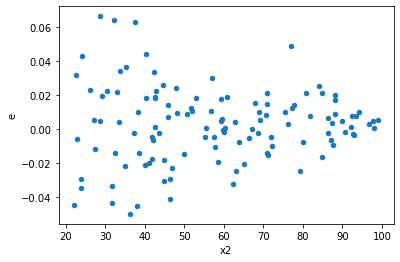

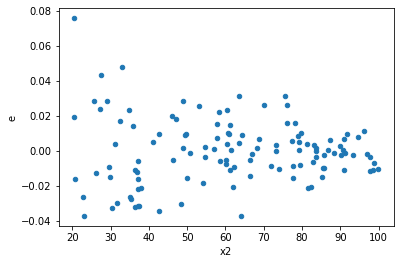

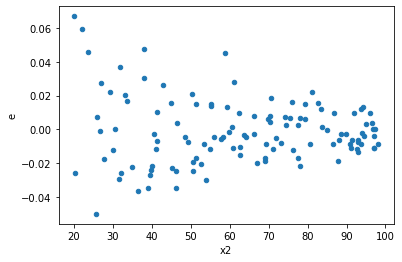

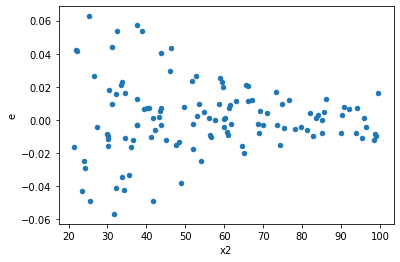

In [23]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [24]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [25]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,66.0,0.010663152595402238,0.036012982412008225,0.00023180766511743996,0.0005456512486667913,2.3538964873760744,0.0014393807598973574,0.9992803096200513,0.0007196903799486787,Reject001=0 : Heteroscedasticity
1.0,62.0,50.0,0.021221586713704547,0.02527330128947481,0.000342283656672654,0.0005054660257894962,1.4767460144113835,0.15565731050170206,0.922171344749149,0.07782865525085103,Reject001=1 : Homoscedasticity
2.0,46.0,66.0,0.013200353546885625,0.036623912270304065,0.00028696420754099184,0.0005549077616712737,1.9337176800769031,0.01392897700438911,0.9930355114978054,0.006964488502194555,Reject001=1 : Homoscedasticity
3.0,71.0,41.0,0.019210605686740254,0.032167396063334956,0.0002705719110808486,0.0007845706356910965,2.8996751087612407,0.00037638047359855875,0.9998118097632007,0.00018819023679927938,Reject001=0 : Heteroscedasticity
6.0,58.0,54.0,0.016923666891598018,0.03808646879603369,0.00029178736019996583,0.0007053049777043276,2.4171882470199275,0.0013025159772670492,0.9993487420113665,0.0006512579886335246,Reject001=0 : Heteroscedasticity
7.0,53.0,59.0,0.013554976898023631,0.02368053025982466,0.0002557542810947855,0.00040136491965804506,1.5693380300026907,0.0928123220569832,0.9535938389715084,0.0464061610284916,Reject001=1 : Homoscedasticity
10.0,54.0,58.0,0.014987044750266576,0.03972474753348497,0.00027753786574567736,0.0006849094402324995,2.4678053871759547,0.0008728007320160103,0.999563599633992,0.00043640036600800514,Reject001=0 : Heteroscedasticity
12.0,56.0,56.0,0.01372534335998014,0.03145555600418457,0.00024509541714250253,0.0005617063572175816,2.2917864551135048,0.002312808618999629,0.9988435956905002,0.0011564043094998144,Reject001=0 : Heteroscedasticity
13.0,57.0,55.0,0.020122463541518594,0.02543199386413777,0.00035302567616699287,0.0004623998884388686,1.3098194257692974,0.3166979034181301,0.841651048290935,0.15834895170906504,Reject001=1 : Homoscedasticity


In [26]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,66.0,0.010663152595402238,0.036012982412008225,0.00023180766511743996,0.0005456512486667913,2.3538964873760744,0.0014393807598973574,Reject001=0 : Heteroscedasticity
1.0,62.0,50.0,0.021221586713704547,0.02527330128947481,0.000342283656672654,0.0005054660257894962,1.4767460144113835,0.15565731050170206,Reject001=1 : Homoscedasticity
2.0,46.0,66.0,0.013200353546885625,0.036623912270304065,0.00028696420754099184,0.0005549077616712737,1.9337176800769031,0.01392897700438911,Reject001=1 : Homoscedasticity
3.0,71.0,41.0,0.019210605686740254,0.032167396063334956,0.0002705719110808486,0.0007845706356910965,2.8996751087612407,0.00037638047359855875,Reject001=0 : Heteroscedasticity
4.0,52.0,60.0,0.0602443562732658,0.023206003603689622,0.0011585453129474193,0.0003867667267281604,0.33383823869970103,8.607158460790723e-05,Reject001=0 : Heteroscedasticity
5.0,51.0,61.0,0.04441322382258448,0.024927170750171465,0.000870847525933029,0.00040864214344543383,0.4692464883650134,0.0061965820834985925,Reject001=0 : Heteroscedasticity
6.0,58.0,54.0,0.016923666891598018,0.03808646879603369,0.00029178736019996583,0.0007053049777043276,2.4171882470199275,0.0013025159772670492,Reject001=0 : Heteroscedasticity
7.0,53.0,59.0,0.013554976898023631,0.02368053025982466,0.0002557542810947855,0.00040136491965804506,1.5693380300026907,0.0928123220569832,Reject001=1 : Homoscedasticity
8.0,64.0,48.0,0.030946983470780582,0.00599866332740502,0.0004835466167309466,0.00012497215265427125,0.25844902710550416,6.454769798724614e-07,Reject001=0 : Heteroscedasticity


In [27]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    507
Reject001=1 : Homoscedasticity      493
Name: Result_test, dtype: int64